# Machine Learning - Clustering  

Dataset is download from UCI's machine learning repository and doesn't actually need to be downloaded. Just make sure that you have an active internet connection. 

### Paper on this dataset : Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).

### Link : https://doi.org/10.1007/s00521-018-3523-0

##### Importing necessary information

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
%matplotlib inline

##### Importing the dataset 

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')

#### The dataset consists of 10 numerical and 8 categorical attributes.

The 'Revenue' attribute can be used as the class label.

1. "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
2. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
3. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

##### Printing some basic parameters of the dataframe to get an overview of the data available

In [3]:
print("Dataframe Information : {0}\n\n\nShape : {1}\n\n\nDescription : {2}\n\n\nHead : {3}\n\n\nColumns : {4}".format(data.info(),
                                                                                                data.shape,
                                                                                                data.describe(),
                                                                                                data.head(),
                                                                                                data.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

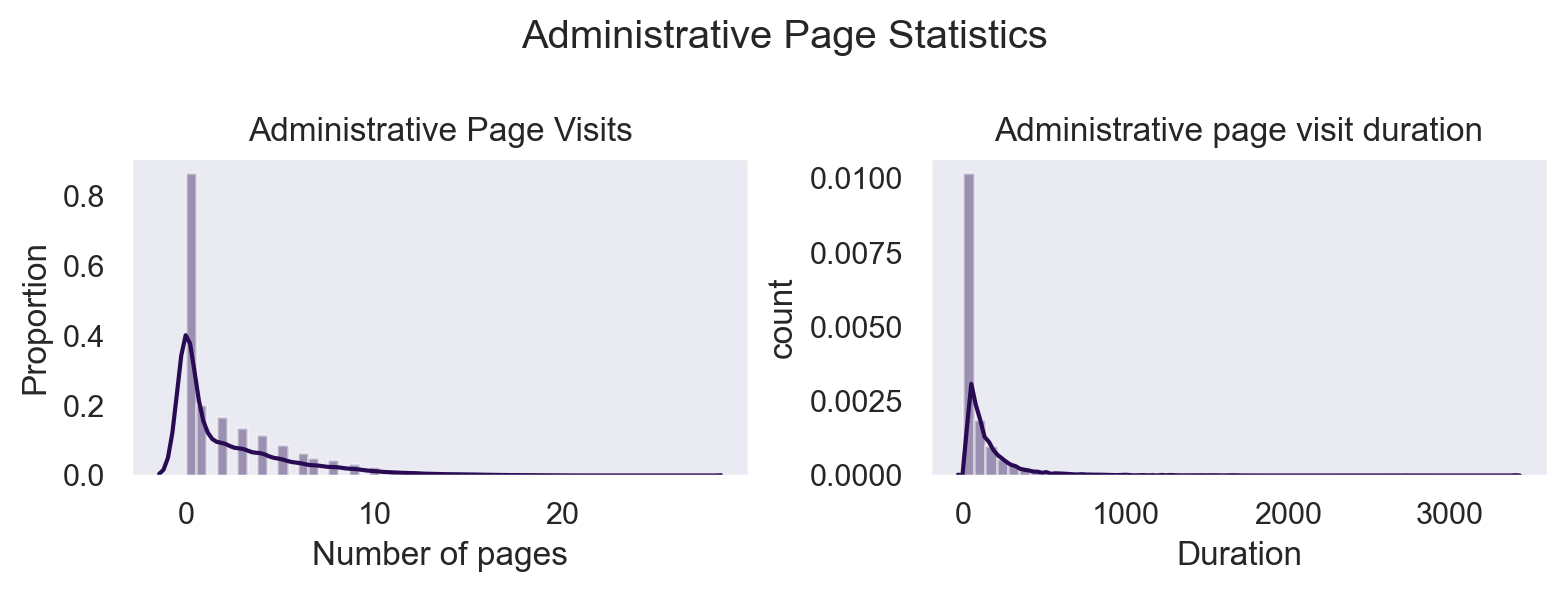

In [4]:
sns.set(style='dark', palette='inferno')

#lets take a look at the distribution of the first & second column column
plt.figure(figsize=(8,3), dpi=200)
plt.subplot(1,2,1)
sns.distplot(data['Administrative'])
plt.title("Administrative Page Visits")
plt.xlabel("Number of pages")
plt.ylabel("Proportion")
plt.tight_layout()

plt.subplot(1,2,2)
sns.distplot(data['Administrative_Duration'])
plt.title("Administrative page visit duration")
plt.xlabel("Duration")
plt.ylabel("count")
plt.tight_layout()
plt.suptitle("Administrative Page Statistics")

plt.subplots_adjust(top=0.75)
plt.show()

In [5]:
temp = len(data[data['Administrative'] == 0])/len(data)
print("%5.2f%% of people don't visit the administrative pages at all!\n"%(temp*100))

temp = len(data[data['Administrative_Duration'] <=100])/len(data)
print("%5.2f%% of times people spent less than 100 seconds in administrative pages"%(temp*100))
print("Maybe they are just there to check out products!\n")

46.78% of people don't visit the administrative pages at all!

76.46% of times people spent less than 100 seconds in administrative pages
Maybe they are just there to check out products!



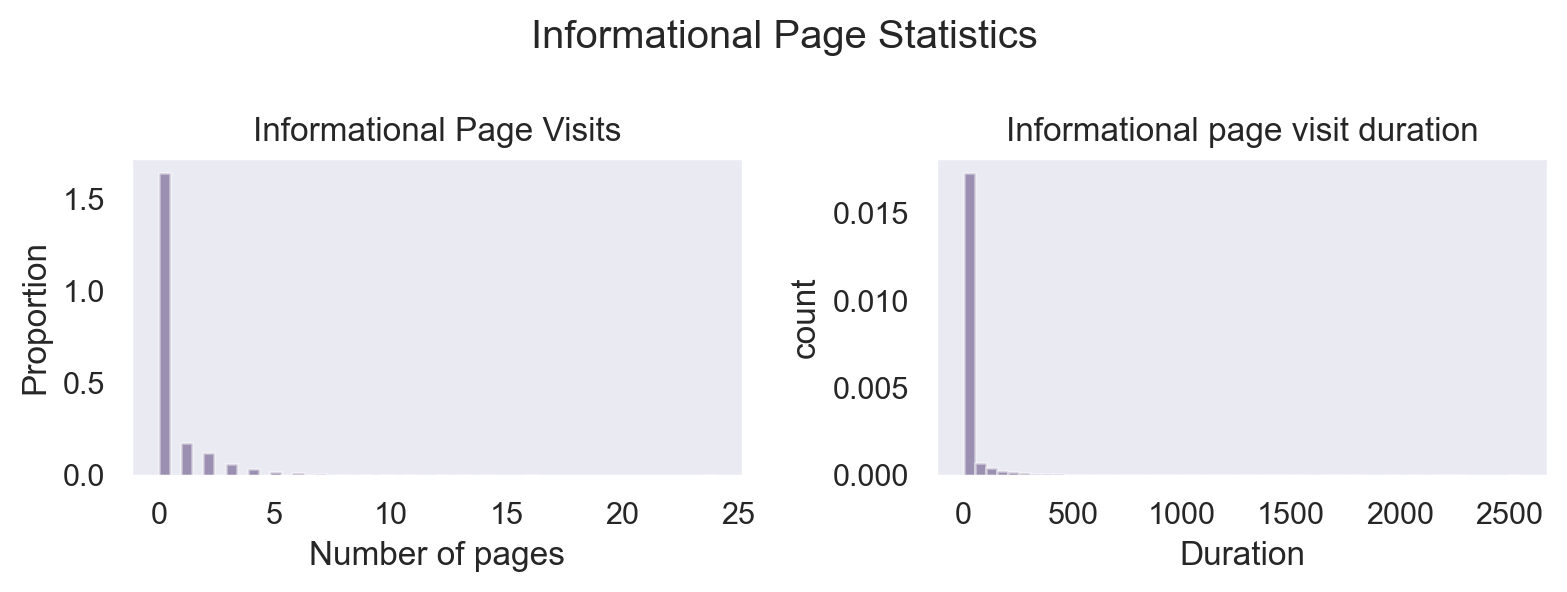

In [6]:
#lets take a look at the distribution of the third & fourth column column
plt.figure(figsize=(8,3), dpi=200)
plt.subplot(1,2,1)
sns.distplot(data['Informational'])
plt.title("Informational Page Visits")
plt.xlabel("Number of pages")
plt.ylabel("Proportion")
plt.tight_layout()

plt.subplot(1,2,2)
sns.distplot(data['Informational_Duration'])
plt.title("Informational page visit duration")
plt.xlabel("Duration")
plt.ylabel("count")
plt.tight_layout()
plt.suptitle("Informational Page Statistics")

plt.subplots_adjust(top=0.75)
plt.show()

In [7]:
temp = len(data[data['Informational'] == 0])/len(data)
print("%5.2f%% of people don't visit the informational pages at all!"%(temp*100))
print("Customers already have the necessary information it seems!\n")

temp = len(data[data['Informational_Duration'] <=100])/len(data)
print("%5.2f%% of times people spent less than 100 seconds in informational pages"%(temp*100))
print("Okay, they aren't spending much time reading through the description!\n")


78.66% of people don't visit the informational pages at all!
Customers already have the necessary information it seems!

91.64% of times people spent less than 100 seconds in informational pages
Okay, they aren't spending much time reading through the description!



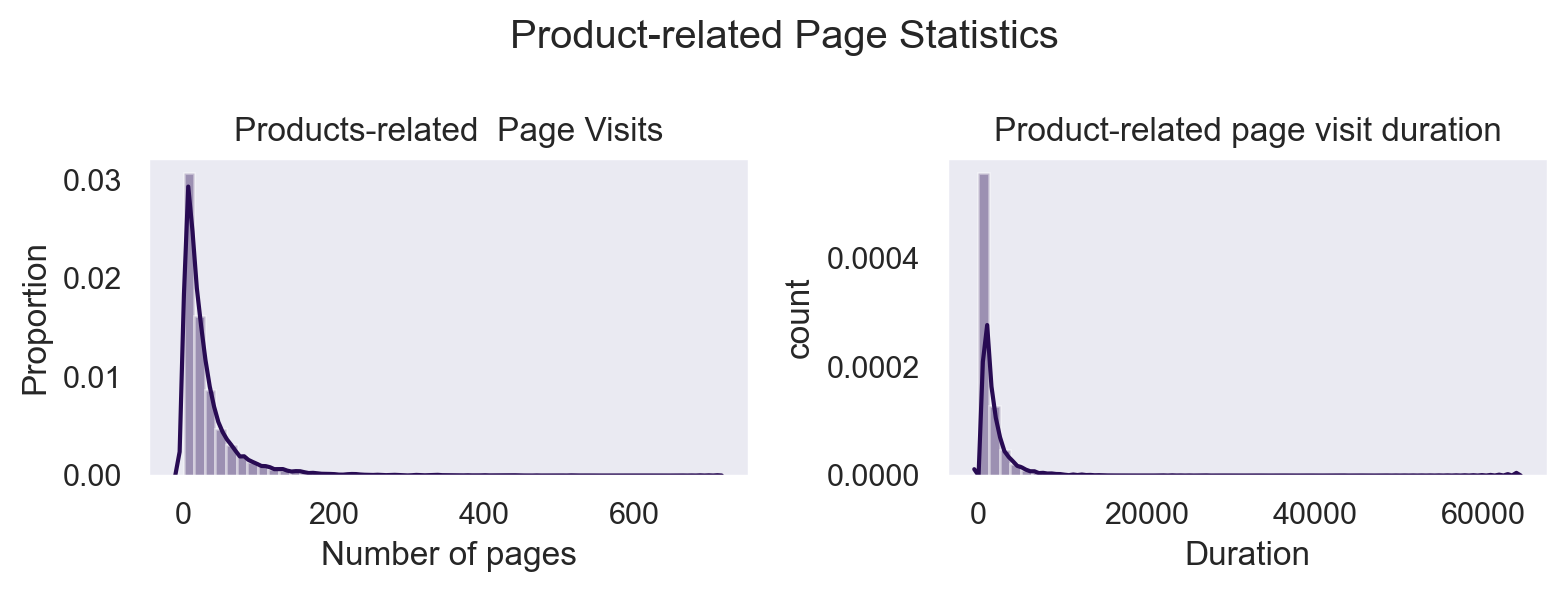

In [8]:
#lets take a look at the distribution of the fifth & sixth column column
plt.figure(figsize=(8,3), dpi=200)
plt.subplot(1,2,1)
sns.distplot(data['ProductRelated'])
plt.title("Products-related  Page Visits")
plt.xlabel("Number of pages")
plt.ylabel("Proportion")
plt.tight_layout()

plt.subplot(1,2,2)
sns.distplot(data['ProductRelated_Duration'])
plt.title("Product-related page visit duration")
plt.xlabel("Duration")
plt.ylabel("count")
plt.tight_layout()
plt.suptitle("Product-related Page Statistics")

plt.subplots_adjust(top=0.75)
plt.show()

In [9]:
temp = len(data[data['ProductRelated'] == 0])/len(data)
print("Only %5.2f%% of people don't visit the product-related pages!"%(temp*100))
print("That's tremendous! People are checking out other options too!\n")

temp = len(data[data['ProductRelated_Duration'] <=100])/len(data)
print("%5.2f%% of times people spent less than 100 seconds in product-related pages!"%(temp*100))
print("Okay, that's good enough! rest 83-ish% are checking out similar products!\n")

Only  0.31% of people don't visit the product-related pages!
That's tremendous! People are checking out other options too!

17.24% of times people spent less than 100 seconds in product-related pages!
Okay, that's good enough! rest 83-ish% are checking out similar products!



In [10]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

## Let's plot the outliers.

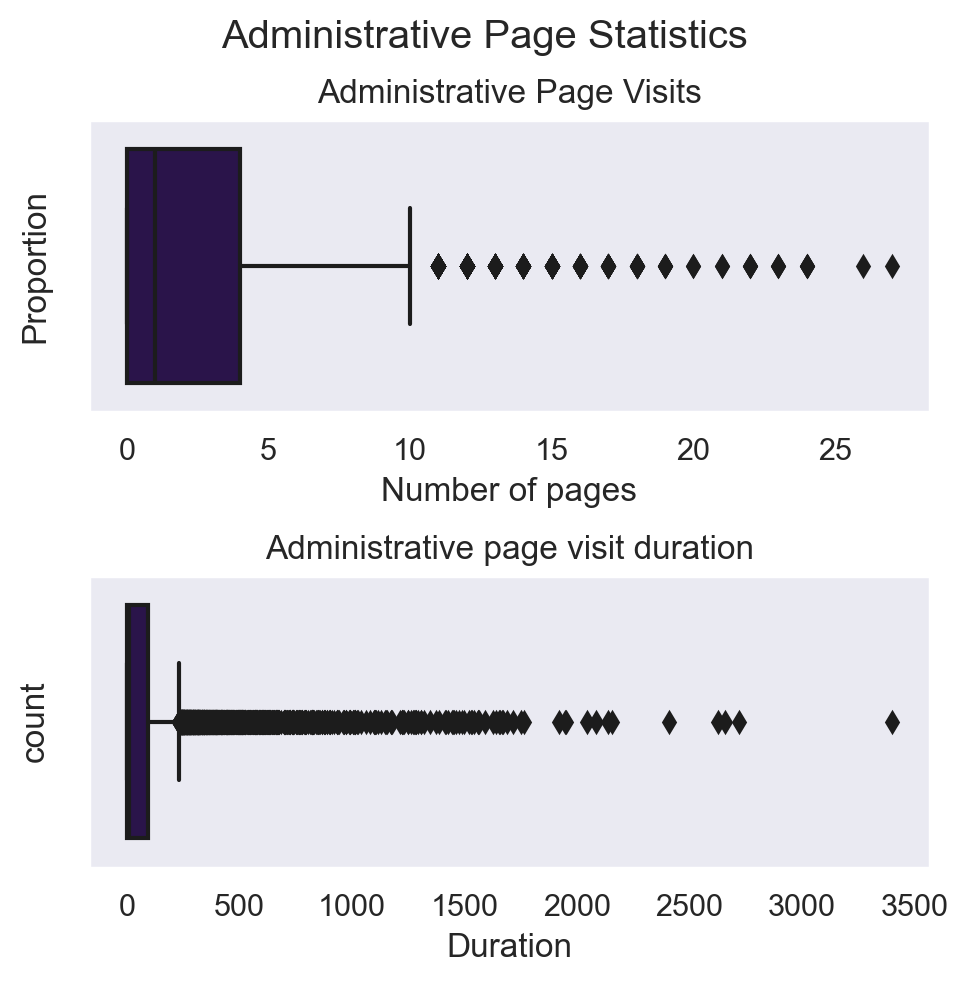

In [11]:
#lets take a look at the distribution of the first & second column column
plt.figure(figsize=(5,5), dpi=200)
plt.subplot(2,1,1)
sns.boxplot(data['Administrative'])
plt.title("Administrative Page Visits")
plt.xlabel("Number of pages")
plt.ylabel("Proportion")
plt.tight_layout()

plt.subplot(2,1,2)
sns.boxplot(data['Administrative_Duration'])
plt.title("Administrative page visit duration")
plt.xlabel("Duration")
plt.ylabel("count")
plt.tight_layout()
plt.suptitle("Administrative Page Statistics")

plt.subplots_adjust(top=0.88)
plt.show()

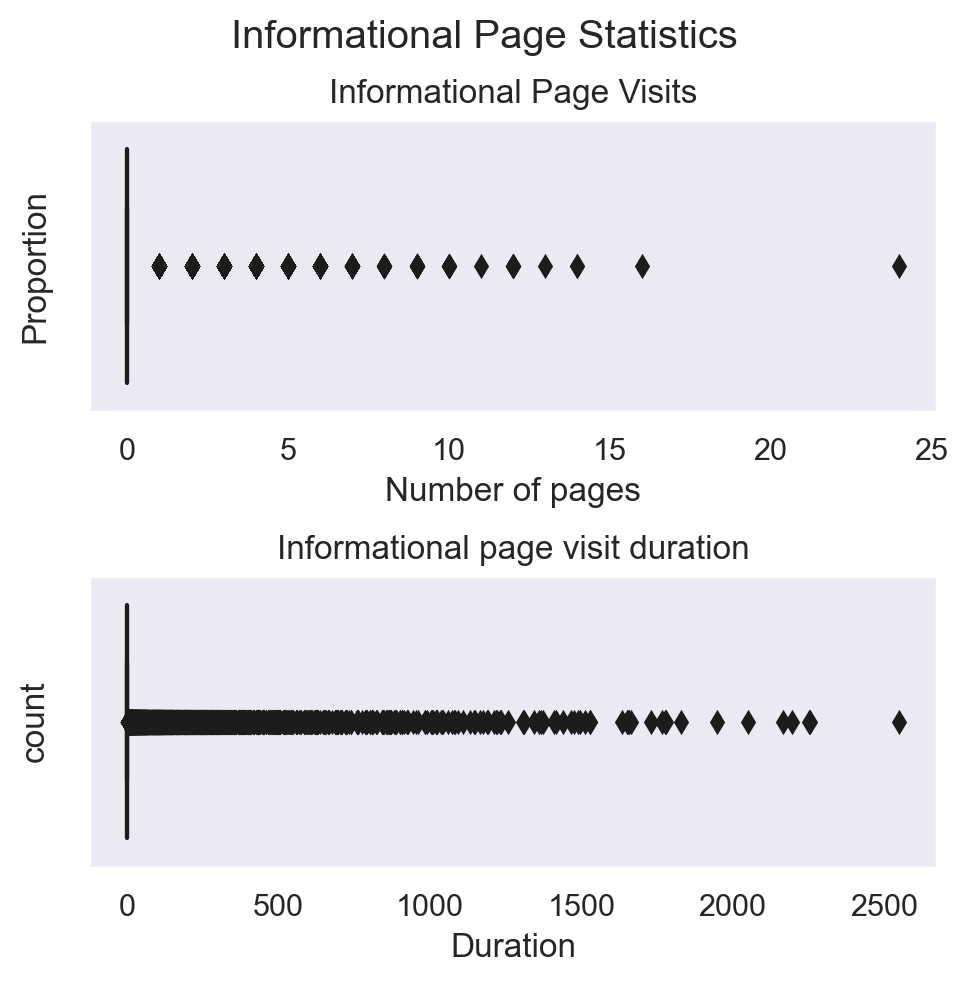

In [12]:
#lets take a look at the distribution of the third & fourth column column
plt.figure(figsize=(5,5), dpi=200)
plt.subplot(2,1,1)
sns.boxplot(data['Informational'])
plt.title("Informational Page Visits")
plt.xlabel("Number of pages")
plt.ylabel("Proportion")
plt.tight_layout()

plt.subplot(2,1,2)
sns.boxplot(data['Informational_Duration'])
plt.title("Informational page visit duration")
plt.xlabel("Duration")
plt.ylabel("count")
plt.tight_layout()
plt.suptitle("Informational Page Statistics")

plt.subplots_adjust(top=0.88)
plt.show()

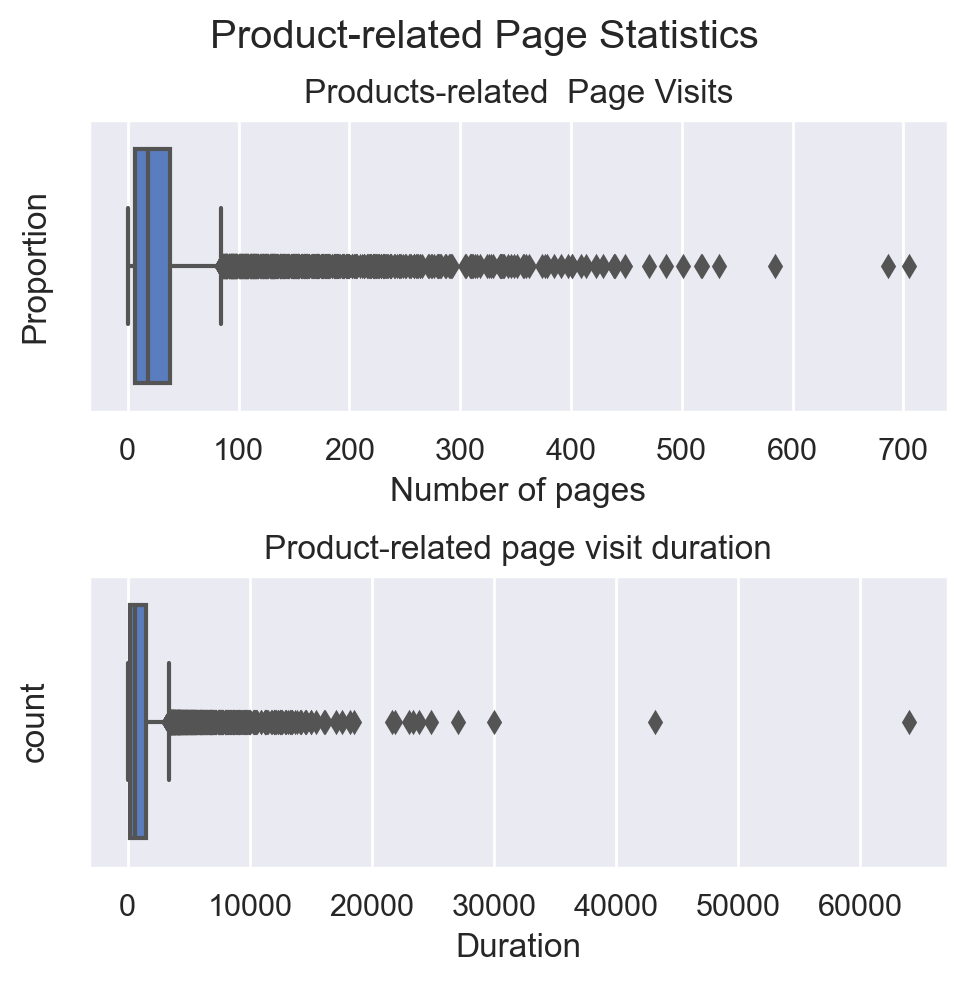

In [13]:
sns.set(palette='muted')

#lets take a look at the distribution of the fifth & sixth column column
plt.figure(figsize=(5,5), dpi=200)
plt.subplot(2,1,1)
sns.boxplot(data['ProductRelated'])
plt.title("Products-related  Page Visits")
plt.xlabel("Number of pages")
plt.ylabel("Proportion")
plt.tight_layout()

plt.subplot(2,1,2)
sns.boxplot(data['ProductRelated_Duration'])
plt.title("Product-related page visit duration")
plt.xlabel("Duration")
plt.ylabel("count")
plt.tight_layout()
plt.suptitle("Product-related Page Statistics")

plt.subplots_adjust(top=0.88)
plt.show()

## Those plots were static. Let's do some interactive visualisations to understand the distribution!

Administrative page visits and their durations!

fig = px.histogram(data, x='Administrative', marginal='box', hover_data=data.columns,
                  title="Interactive Histogram for Administrative Page Visits", 
                  color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

fig = px.histogram(data, x='Administrative_Duration', marginal='box', hover_data=data.columns,
                  title="Interactive Histogram for Administrative Page Visit Duration", 
                  color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

Informational page visits and their durations!

fig = px.histogram(data, x='Informational', marginal='box', hover_data=data.columns,
                  title="Interactive Histogram for Informational Page Visits", 
                  color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

fig = px.histogram(data, x='Informational_Duration', marginal='box', hover_data=data.columns,
                  title="Interactive Histogram for Informational Page Visit Durations", 
                  color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

Related product page visits and their durations!

fig = px.histogram(data, x='ProductRelated', marginal='box', hover_data=data.columns,
                  title="Interactive Histogram for Product-related Page Visits", 
                  color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

### Let's explore rest of the attributes!

Let's look at the bounce rate for a page!

fig = px.histogram(data, x='BounceRates', hover_data=data.columns,
                  marginal='violin', color_discrete_sequence = px.colors.sequential.Blackbody,
                  title='Interactive Histogram for bounce rate of pages!')
fig.show()

This value seems very insignificant. Maximum value of bounce rate is 0.2. We can treat them as outliers when we train models.

Let's look at the exit rate for the page!

fig = px.histogram(data, x='ExitRates', title='Interactive Histogram for exit rate of pages!',
                  marginal='box', color_discrete_sequence=px.colors.sequential.Aggrnyl,
                  hover_data=data.columns)
fig.show()

ExitRate > BounceRate for any page k!

We see many pages having exit rates between 0 and 0.03. There are numerous pages having 0.2 exit rate. This cannot be called as an outlier situation. Maybe those pages aren't promoted enough to be viewed by customers or maybe the products are not that appealing. We will not be treating them as outliers. 

Need to make static graphs as GitHub doesn't show interactive graphs!

Plotting bounce and exit rates

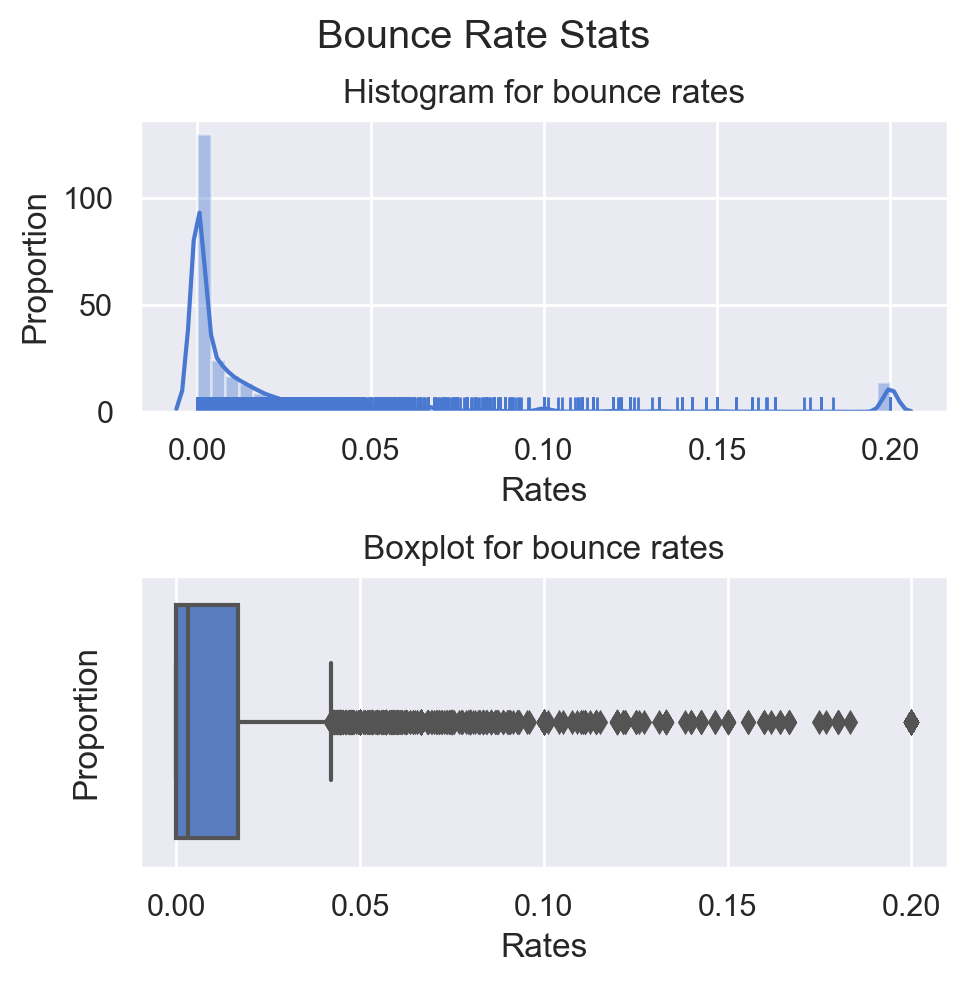

In [14]:
plt.figure(figsize=(5,5), dpi=200)
plt.subplot(2,1,1)
sns.distplot(data['BounceRates'], kde=True, rug=True)
plt.title("Histogram for bounce rates")
plt.xlabel("Rates")
plt.ylabel("Proportion")
plt.tight_layout()

plt.subplot(2,1,2)
sns.boxplot(data['BounceRates'])
plt.title("Boxplot for bounce rates")
plt.xlabel("Rates")
plt.ylabel("Proportion")
plt.tight_layout()
plt.suptitle("Bounce Rate Stats")

plt.subplots_adjust(top=0.88)
plt.show()

fig = px.strip(data, x='Revenue', y='BounceRates', color='Revenue')
fig.show()

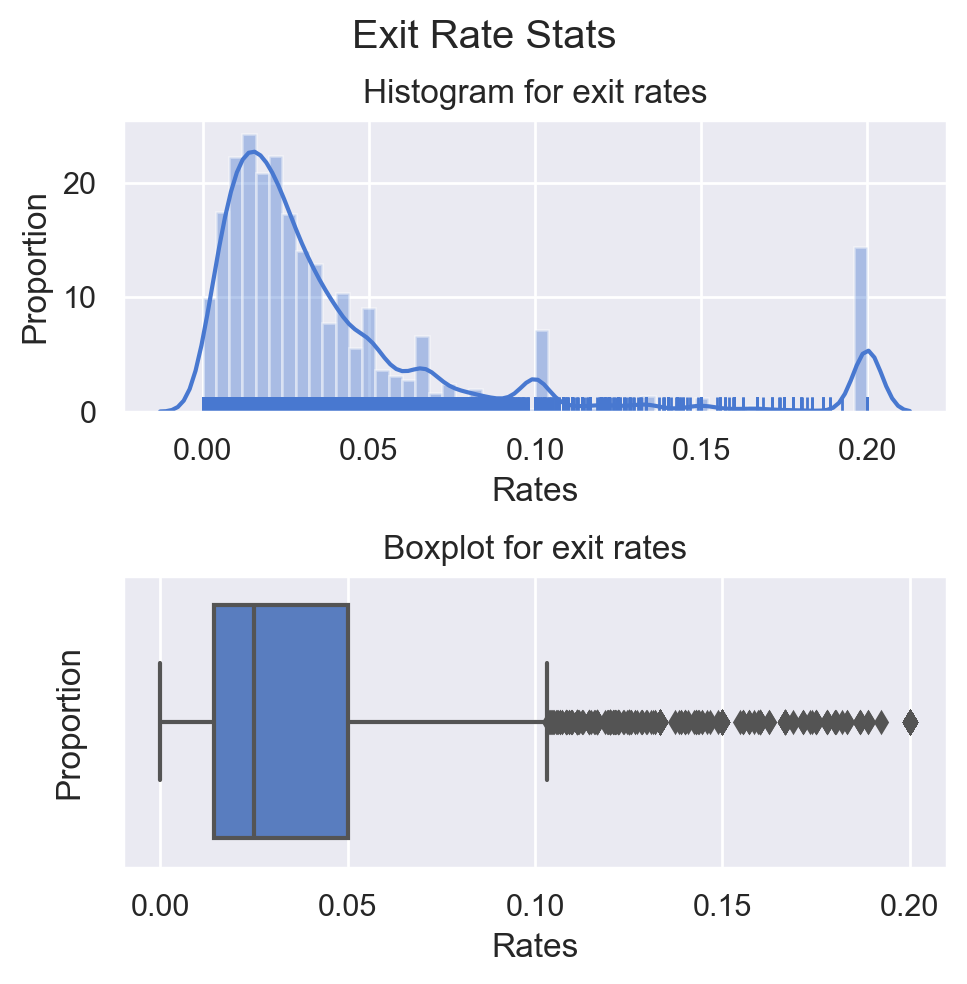

In [15]:
plt.figure(figsize=(5,5), dpi=200)
plt.subplot(2,1,1)
sns.distplot(data['ExitRates'], kde=True, rug=True)
plt.title("Histogram for exit rates")
plt.xlabel("Rates")
plt.ylabel("Proportion")
plt.tight_layout()

plt.subplot(2,1,2)
sns.boxplot(data['ExitRates'])
plt.title("Boxplot for exit rates")
plt.xlabel("Rates")
plt.ylabel("Proportion")
plt.tight_layout()
plt.suptitle("Exit Rate Stats")

plt.subplots_adjust(top=0.88)
plt.show()

fig = px.strip(data, x='Revenue', y='ExitRates', color='Revenue', title='Revenue vs Exit Rates')
fig.show()

Let's explore page values!

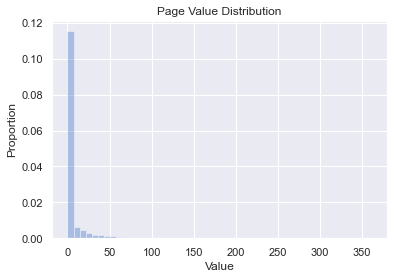

In [16]:
data_temp = data.sort_values(['PageValues'], ascending=False)
#print(data_temp)
#fig = px.histogram(data_temp, x='PageValues', title='Page Value distribution', hover_data=data.columns)
#fig.show()

sns.distplot(data_temp['PageValues'])
plt.title("Page Value Distribution")
plt.xlabel("Value")
plt.ylabel("Proportion")
plt.show()

fig = px.strip(data, x='Revenue', y='PageValues', title='Revenue vs Page values', color='Revenue')
fig.show()

In [17]:
temp = len(data[data['PageValues'] == 0])/len(data)
print("%5.2f%% of pages have 0 page value!\n"%(temp*100))
print(data['PageValues'].describe())

77.86% of pages have 0 page value!

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64


Up till 3rd quartile, the page values are 0.

###### Inspecting number of special days by month! 

#data_temp = data.sort_values('SpecialDay')
#data_temp = data_temp.sort_values('Month')

#print(data_temp.iloc[0])
fig = px.histogram(data, x='Month', color='SpecialDay',
                  color_discrete_sequence = px.colors.qualitative.Pastel)
fig.show()

We can see that only February and May has special days. 

<AxesSubplot:xlabel='SpecialDay'>

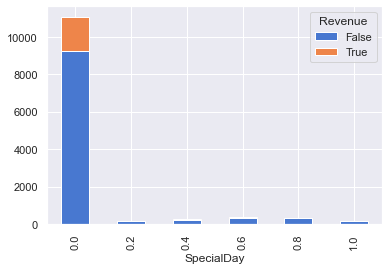

In [18]:
temp = data.copy()
temp = pd.pivot_table(temp, index='SpecialDay', 
                      columns='Revenue', aggfunc=len, fill_value=0)
temp = temp.Administrative
temp.plot(kind='bar', stacked=True)

Month-wise special day distribution

Text(0.5, 1.0, 'Month-wise distribution of transactions')

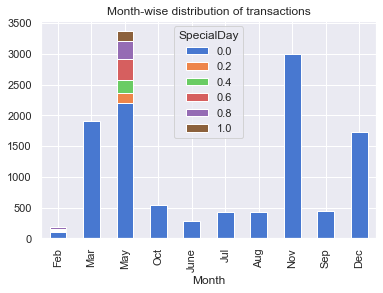

In [19]:
t_df = data.groupby(['Month','SpecialDay'],sort=False)['Month'].count().unstack('SpecialDay').fillna(0)
t_df = t_df.reindex(sorted(t_df.columns),axis=1)
t_df.plot(kind='bar',stacked=True)
plt.Figure(figsize=(5,5), dpi=300)
plt.title("Month-wise distribution of transactions")

In [20]:
data['OperatingSystems'].unique()

array([1, 2, 4, 3, 7, 6, 8, 5], dtype=int64)

##### Checking out different operating systems used by customers 

temp = data.sort_values('OperatingSystems')
#temp.head()
fig = px.histogram(temp, x='OperatingSystems', color='OperatingSystems')
fig.show()

We can conclude that most of the people use 1,2,3 or 4 operating systems!

Sidenote: Here, this field should be treated as a category and not a float64 type object!

##### Checking out different browsers used by the customers! 

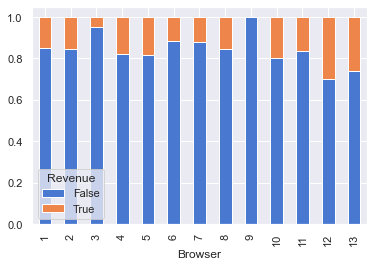

In [21]:
temp = data.sort_values('Browser')
#temp.head()
#fig = px.histogram(temp, x='Browser', color='Revenue')
#fig.show()

df = pd.crosstab(data['Browser'],data['Revenue'])
df.div(df.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True)
plt.show()

All the browsers have similar likeliness to do revenue! 

Browser number 1 and 2 are highly used!

reg = np.arange(1,14)
reg_count = [0 for _ in reg]
#print(len(data[data.Region == 1]))

for i in range(0,13):
    reg_count[i] = len(data[data.Region == i+1])
        
fig = go.Figure(data = [go.Scatter(x = reg, y = reg_count, mode="markers", 
                                   marker = dict(size=[i*0.05 for i in reg_count], color=reg_count, showscale=True))])
fig.update_layout(title='Users of different browsers', xaxis_title='Browser', yaxis_title='Count')
fig.show()

Most used browsers are 1,2 4 and 5

##### Plotting regions customers belong to!

reg = np.arange(1,10)
reg_count = [0 for _ in reg]
#print(len(data[data.Region == 1]))

for i in range(0,9):
    reg_count[i] = len(data[data.Region == i+1])
        
fig = go.Figure(data = [go.Scatter(x = reg, y = reg_count, mode="markers", marker = dict(size=[i*0.05 for i in reg_count], color=reg_count, showscale=True))])
fig.update_layout(title='Distribution of customers by Region', xaxis_title='Region', yaxis_title='Count')
fig.show()

In [22]:
reg = np.arange(1,21)
reg_count = [0 for _ in reg]
#print(len(data[data.Region == 1]))

for i in range(0,20):
    reg_count[i] = len(data[data.TrafficType == i+1])
        
fig = go.Figure(data = [go.Scatter(x = reg, y = reg_count, mode="markers", marker = dict(size=[i*0.05 for i in reg_count], color=reg_count, showscale=True))])
fig.update_layout(title='Plot of Traffic Types', xaxis_title='Traffic-type', yaxis_title='Count')
fig.show()

x = ['']
y = []

tmp = data.groupby('VisitorType').count()
y = tmp.Administrative
y = y.sort_values(ascending=False)
x = y.index
fig = go.Figure(go.Bar(x=x, y=y, 
                       marker={'color': y, 
                       'colorscale': 'Viridis'}))
fig.update_layout(title='Distribution of the visitor types!')
fig.show()

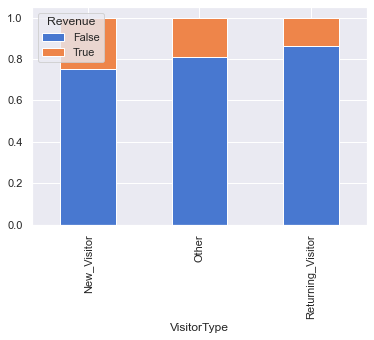

In [23]:
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

Each visitor type has somehwat eqaul proportions in making a revenue!

fig = px.density_heatmap(data, y='Revenue', x='SpecialDay', title='Density Heatmap for Revenue vs SpecialDay')
fig.show()

##### By hovering over, the spans for false and true, we can see the count values for all Special Day values!
##### We can infer that almost no sales have been done on Special days!
##### Most revenue is generated days which are not special!
#### Interesting!

fig = px.histogram(data, x='Weekend', color='Revenue', title='Countplot for Revenue-wise Weekend days')
fig.show()

fig = px.density_heatmap(data, x='Weekend', y='Revenue', title="Revenue vs Weekend heatmap"); fig.show()

### Revenues were made 3x more when the day of transaction was not a weekend!

#### Okay, that's interesting! 

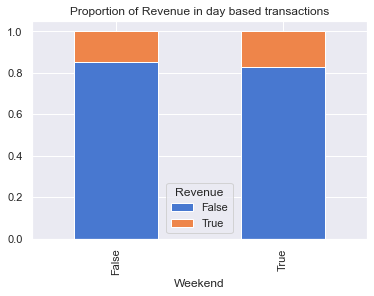

In [24]:
df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True, title='Proportion of Revenue in day based transactions')
plt.show()

fig = px.histogram(data, color='Revenue', x='ProductRelated', y='Weekend',
                  title='Weekend vs Product-Related page hits')
fig.show()

#### People spent more time looking for products when it was a weekday!

<AxesSubplot:xlabel='VisitorType'>

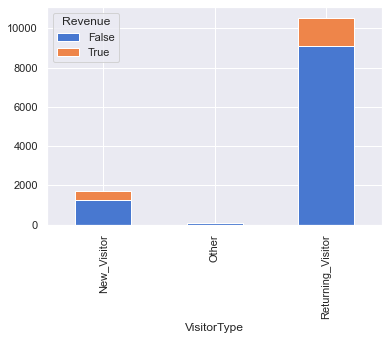

In [25]:
#fig = px.histogram(data, x='VisitorType', color='Revenue', title='Visitor types')
#fig.show()

temp = pd.pivot_table(data, columns={'Revenue'}, index='VisitorType', aggfunc=len)
temp = temp['Administrative']
temp.plot(kind='bar', stacked=True)


## Let's do feature selection now! 

#### Creating a temporary dataframe with some modifications done to the original one.

In [26]:
temp = data.copy()
#print(temp.head(1))
month = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,
         'Nov':11, 'Dec':12}
temp['Month'] = temp.Month.map(month)


#### Doing OneHotEncoding on the visitor-type column........

In [27]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
d = temp['VisitorType']
values = np.array(d)
print(values)

label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(values)
print(int_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
int_encoded = int_encoded.reshape(len(int_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(int_encoded)
print(onehot_encoded)

temp['VisitorType'] = onehot_encoded

['Returning_Visitor' 'Returning_Visitor' 'Returning_Visitor' ...
 'Returning_Visitor' 'Returning_Visitor' 'New_Visitor']
[2 2 2 ... 2 2 0]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


#### Selecting features with the help of chi2 distribution

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = temp.loc[:,:'Weekend']
y = temp.iloc[:,-1]
bestFeatures = SelectKBest(score_func=chi2, k=10)
fit = bestFeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs','Scores']
print(featureScores.nlargest(10, 'Scores'))

                      Specs         Scores
5   ProductRelated_Duration  877404.339415
8                PageValues  175126.808512
1   Administrative_Duration   41754.836841
3    Informational_Duration   35059.775770
4            ProductRelated   19317.285376
0            Administrative    1133.965531
2             Informational     357.981605
10                    Month     300.903189
15              VisitorType     115.339482
9                SpecialDay      53.797094


#### Feature Importance using ExtraTreesClassifier

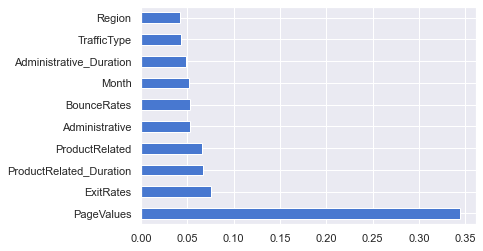

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

#### Correlation heatmap 

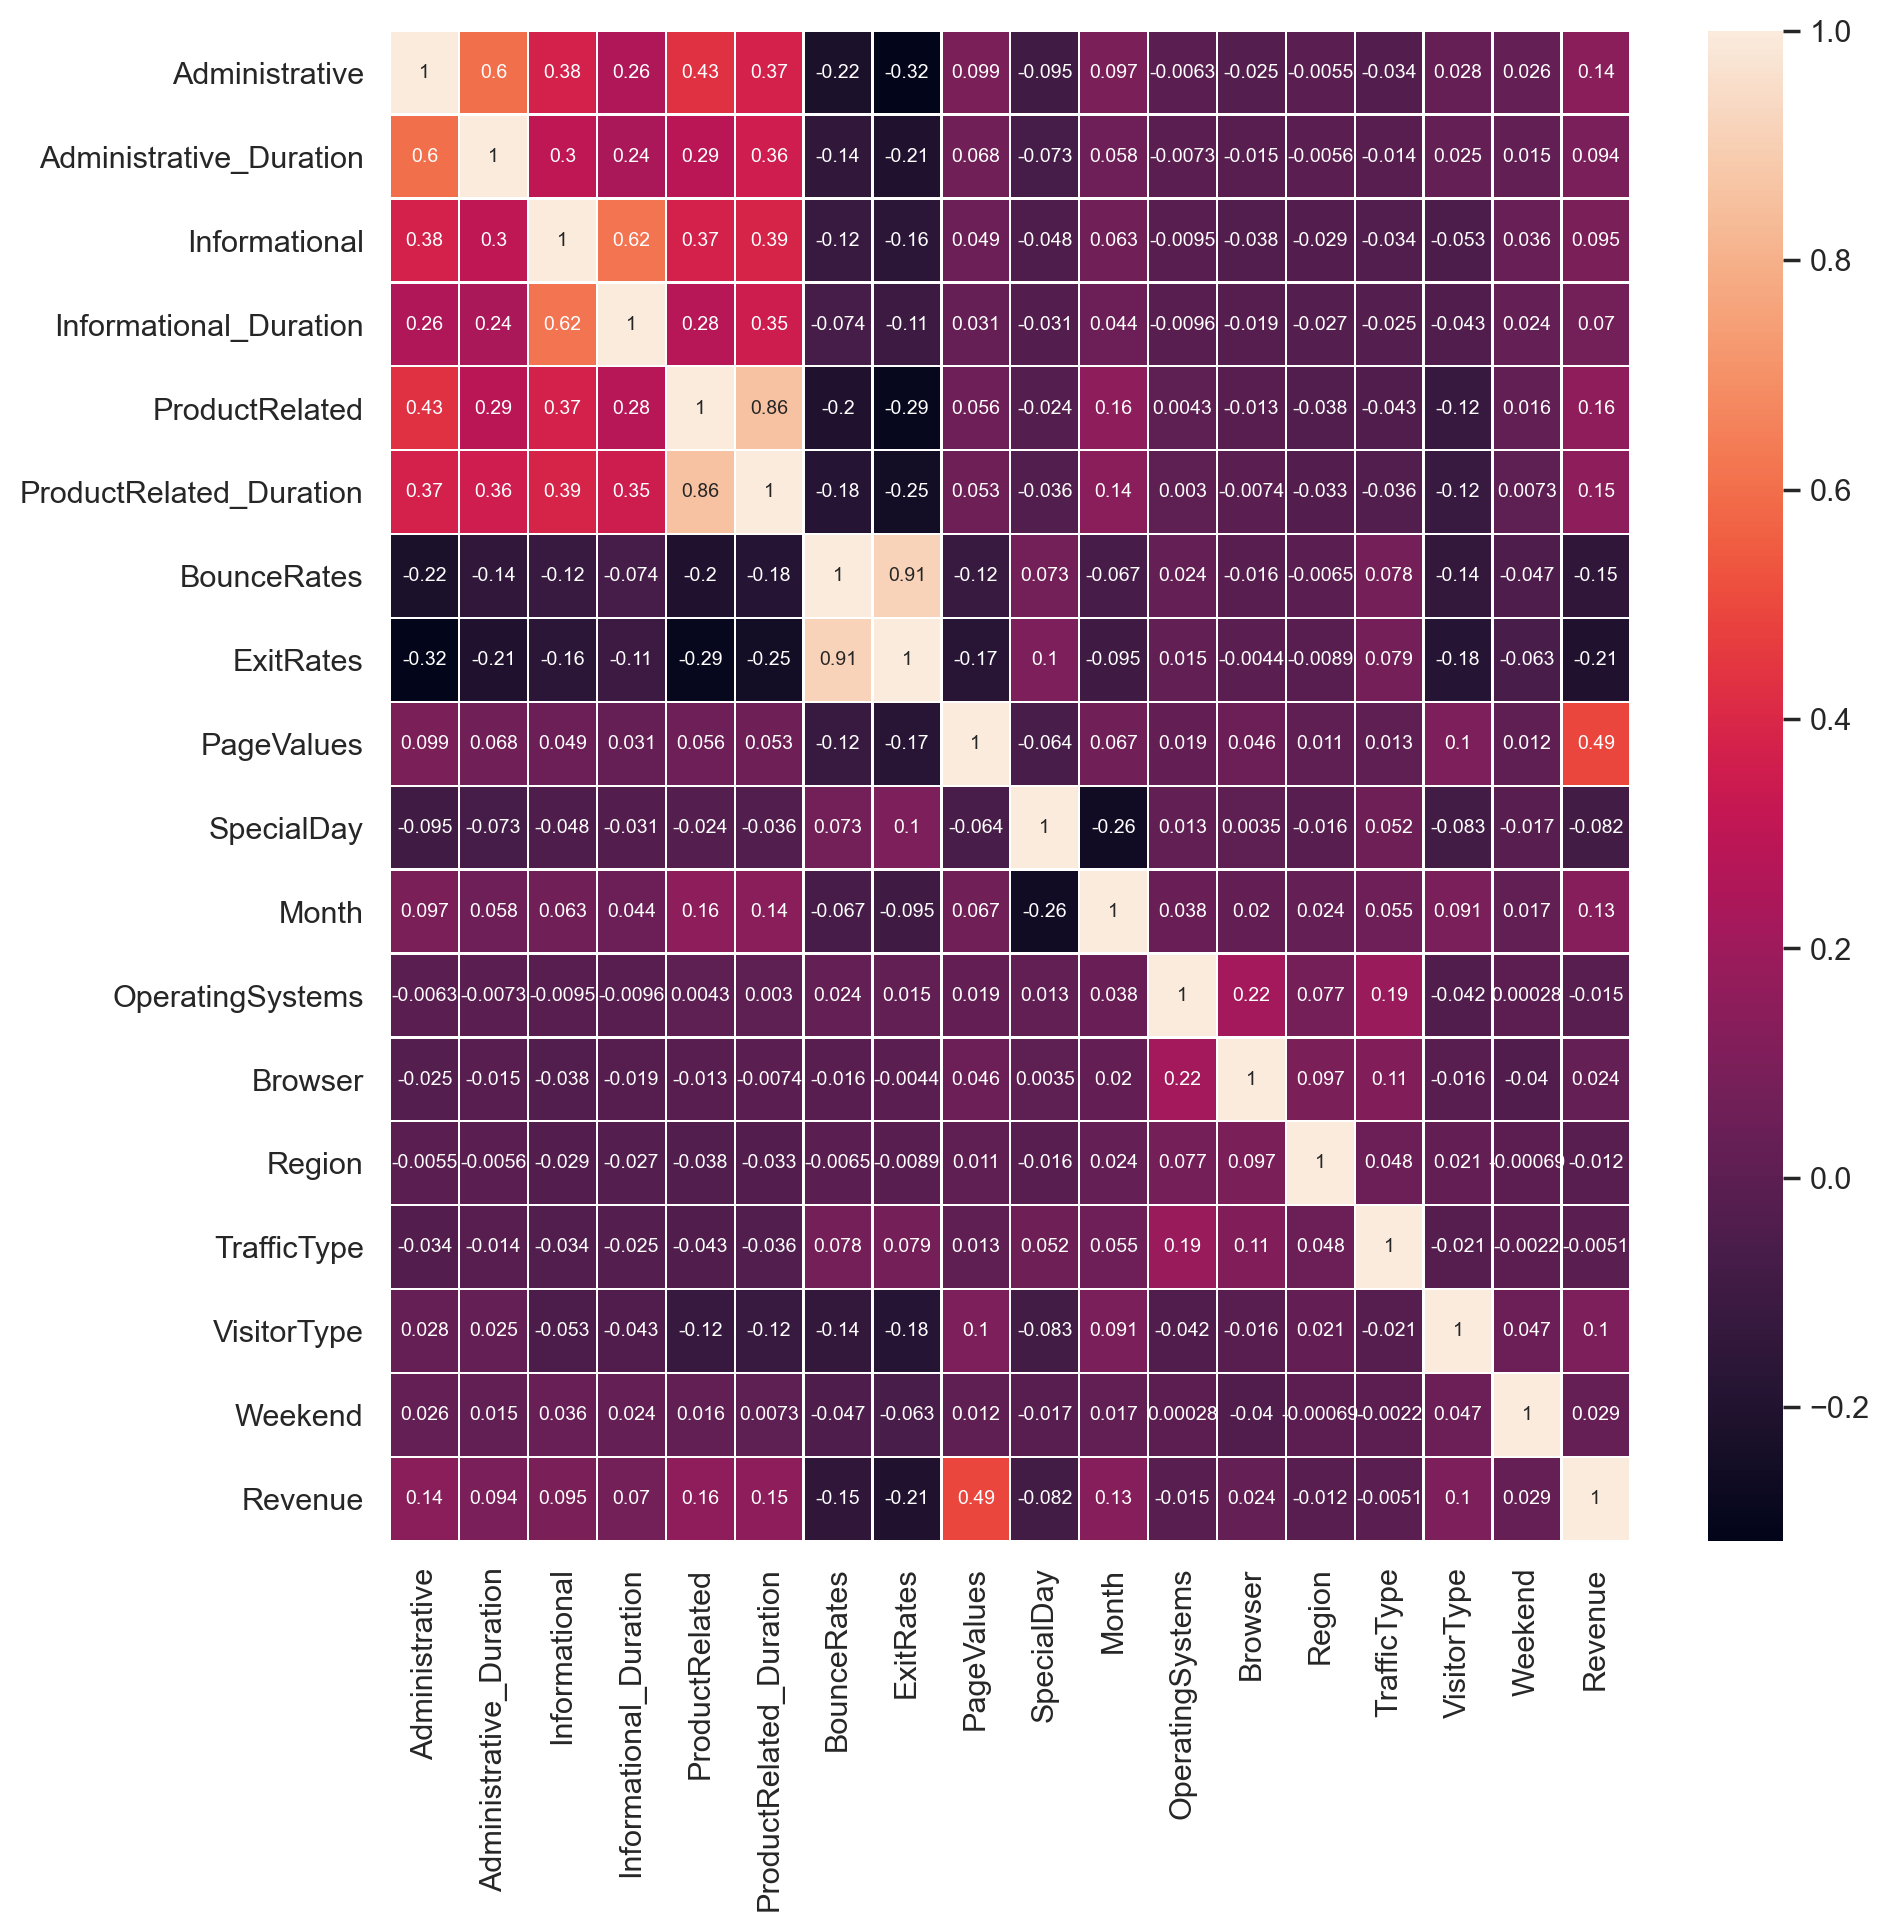

In [30]:
f, ax = plt.subplots(figsize=(10,10), dpi = 200)
sns.heatmap(temp.corr(), annot=True, ax=ax, linewidths=0.5, annot_kws=dict(fontsize=7))

plt.show()

#### Correlation heatmap in Plotly 

fig = go.Figure(data=go.Heatmap(z=temp.corr(),
                               x=temp.columns, y=data.columns)) 
fig.show()

## Clustering Analysis

#### KMeans clustering to understand the habits of customers using ProductRelated page hits and the ExitRates 

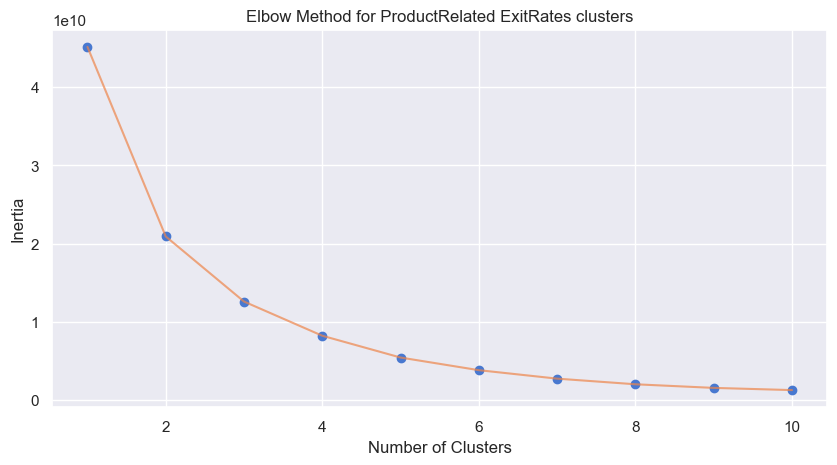

In [31]:
from sklearn.cluster import KMeans

X1 = temp[['Informational', 'ProductRelated_Duration']].values
inertia = []
for n in range(1,11):
    algo = KMeans(n_clusters = n, init='k-means++', n_init=15, max_iter=400, tol=0.0001, 
                  random_state=111, algorithm='elkan')
    algo.fit_predict(X1)
    inertia.append(algo.inertia_)
    
plt.figure(figsize=(10,5), dpi=100)
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.7)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for ProductRelated ExitRates clusters")
plt.show()

#### We choose n = 2 for there is maximum bend in the plot at 2!

In [32]:
algo = KMeans(n_clusters = 2, init='k-means++', n_init=10, max_iter=300, tol=0.001, 
             random_state=111, algorithm='elkan')
algo.fit_predict(X1)

#saving the labels assigned to points
labels = algo.labels_
#saving the centroids made by the KMeans algo
centroids = algo.cluster_centers_

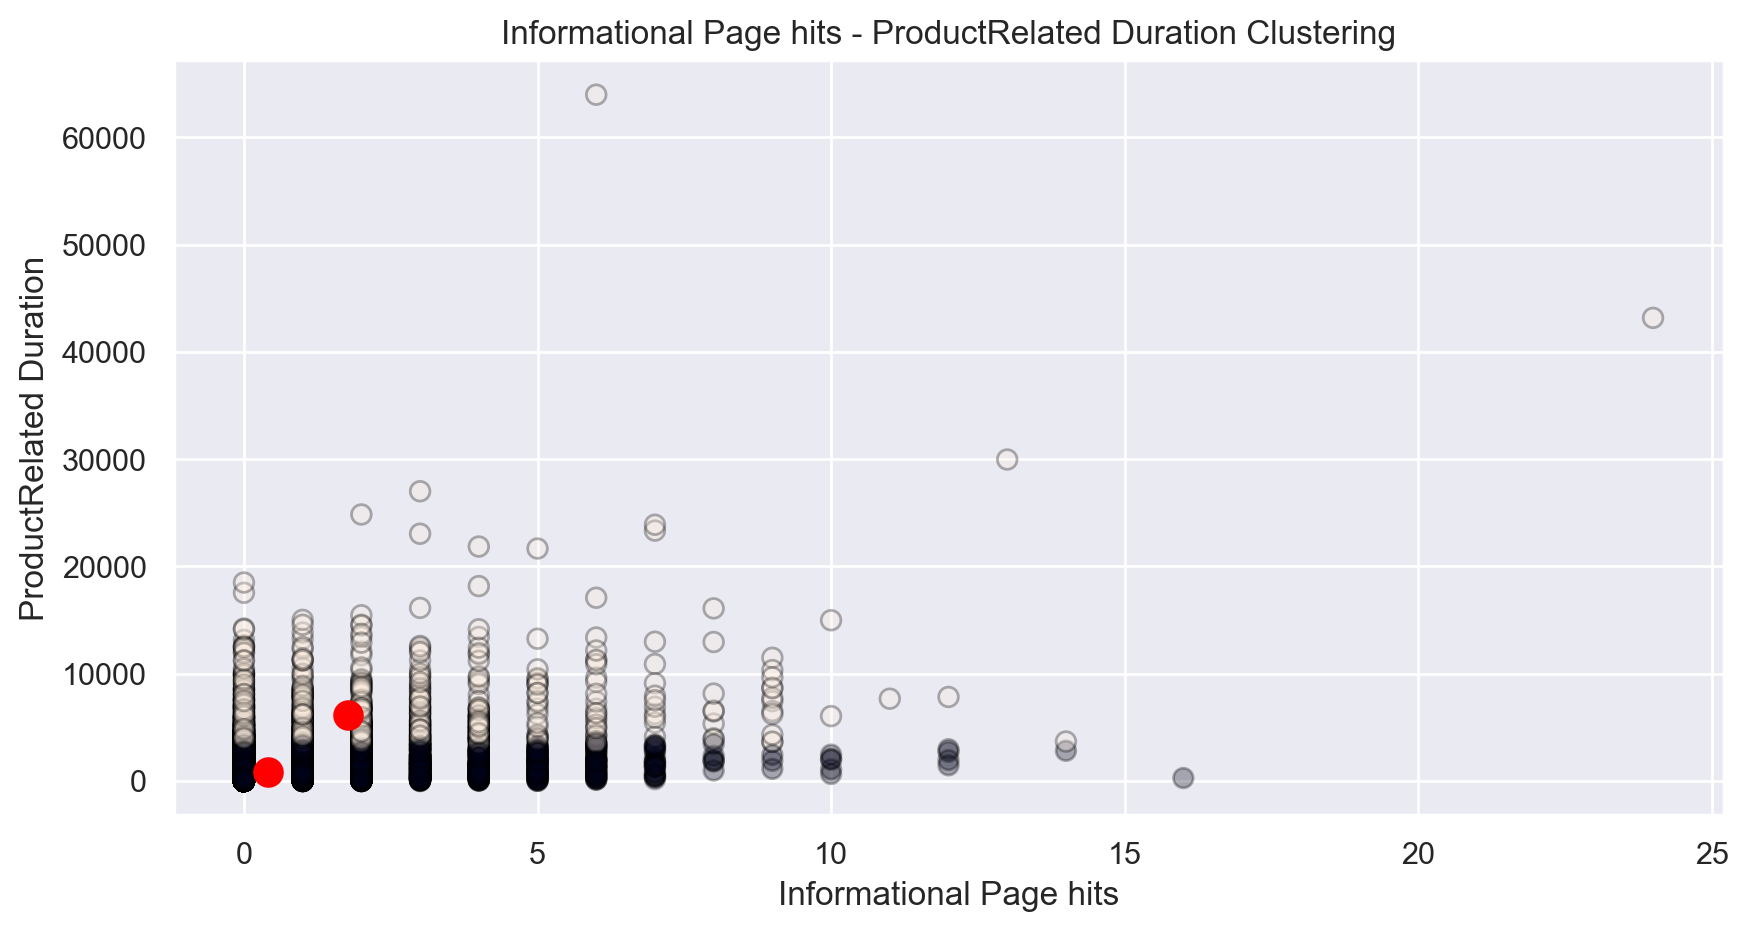

In [33]:
plt.figure(figsize=(10,5), dpi=200)
plt.clf()

#plotting the points
plt.scatter(x='Informational', y='ProductRelated_Duration', data=temp, c=labels, s=50, edgecolors='black', alpha=0.3)
#plotting the centroids
plt.scatter(x=centroids[:,0], y=centroids[:,1], s=100, c='red')

plt.xlabel("Informational Page hits")
plt.ylabel("ProductRelated Duration")
plt.title("Informational Page hits - ProductRelated Duration Clustering")
plt.show()


#### The Black cluster is the type of people who spent time reading a specific product.
#### While the off-white cluster is the type of people who spent time viewing different options without knowing too much about it!

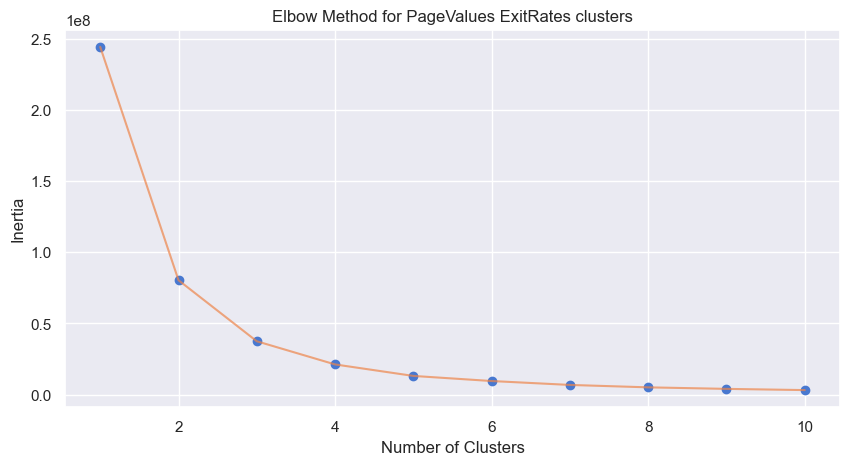

In [34]:
from sklearn.cluster import KMeans

X1 = temp[['Informational_Duration', 'BounceRates']].values
inertia = []
for n in range(1,11):
    algo = KMeans(n_clusters = n, init='k-means++', n_init=15, max_iter=400, tol=0.0001, 
                  random_state=111, algorithm='elkan')
    algo.fit_predict(X1)
    inertia.append(algo.inertia_)
    
plt.figure(figsize=(10,5), dpi=100)
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.7)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for PageValues ExitRates clusters")
#sns.stripplot(x=np.arange(1,11), y=inertia, marker='o')
#sns.lineplot(x=np.arange(1,11), y=inertia, alpha=0.7)
plt.show()

#### Choosing n=2 

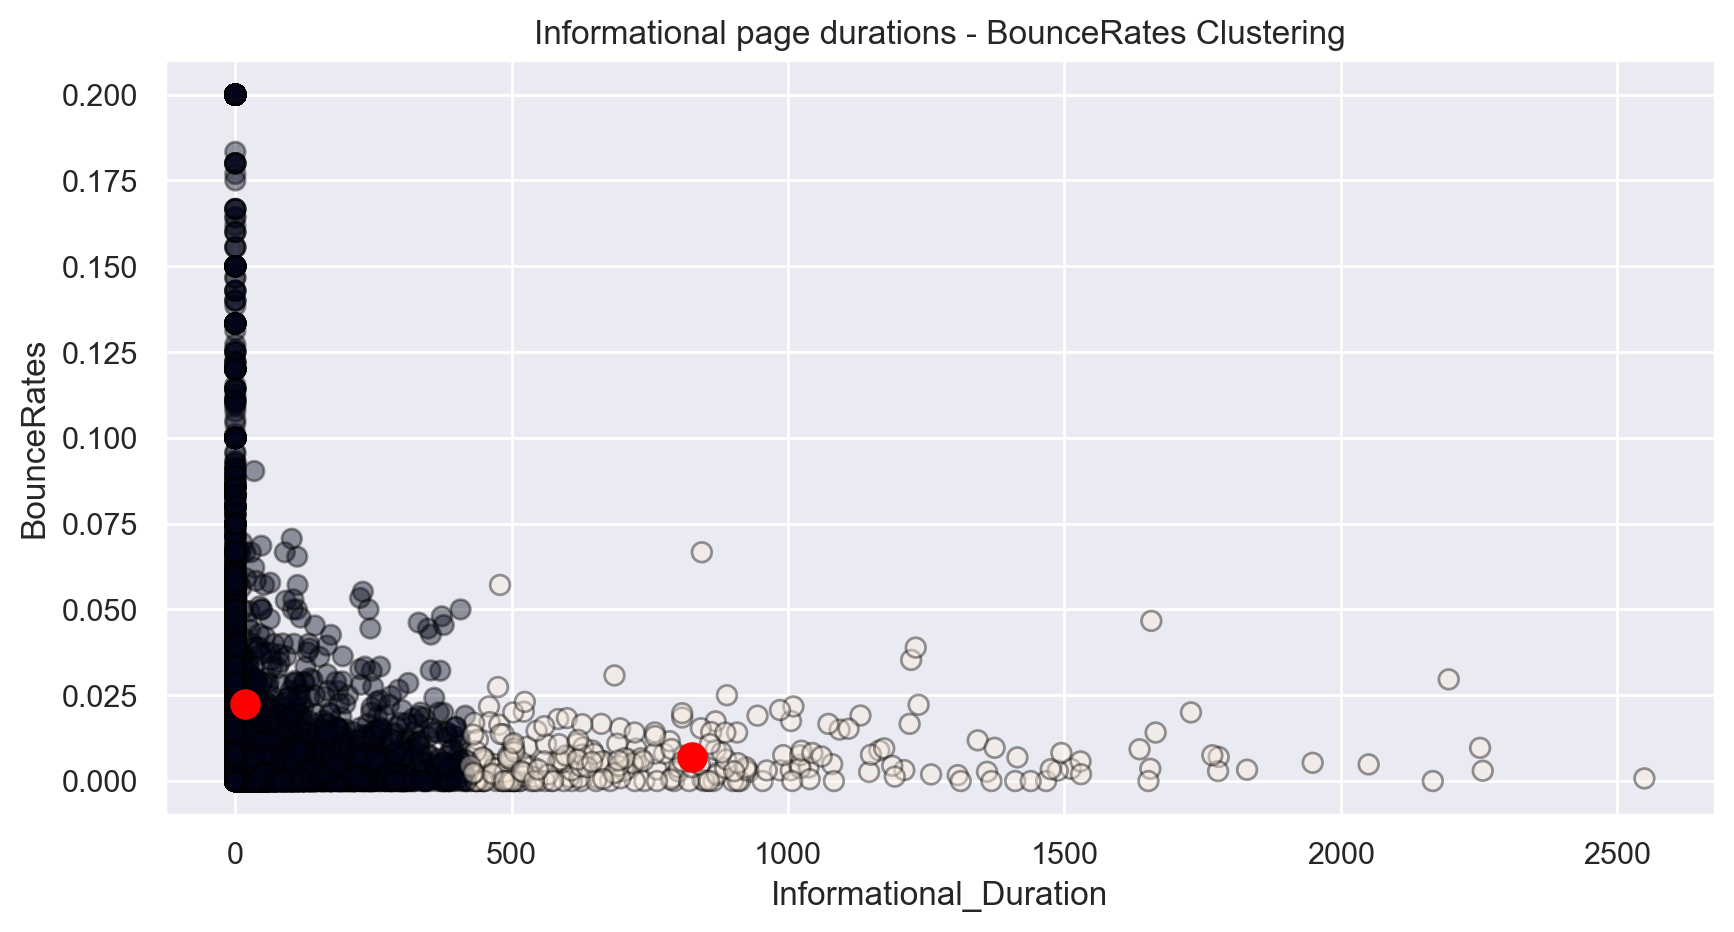

In [35]:
algo = KMeans(n_clusters=2, init='k-means++', n_init=15, max_iter=400, tol=0.0001,
             random_state=111, algorithm='elkan')
algo.fit_predict(X1)

labels = algo.labels_
centroids = algo.cluster_centers_

plt.figure(figsize=(10,5), dpi=200)
plt.clf()

plt.scatter(x='Informational_Duration', y='BounceRates', data=temp, c=labels, s=50, edgecolors='black', alpha=0.4)
plt.scatter(x=centroids[:,0], y=centroids[:,1], c='red', s=100)
plt.xlabel("Informational_Duration")
plt.ylabel("BounceRates")
plt.title("Informational page durations - BounceRates Clustering")
plt.show()

#### The off-white cluster is the collection of transactions in which customers were genuinely interested. 
#### While the black cluster transactions were the transactions in customers were not interested in the products.

<AxesSubplot:xlabel='labels'>

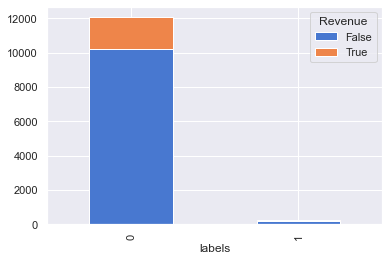

In [36]:
temp_df = pd.DataFrame()
temp_df['labels'] = labels
temp_df['Revenue'] = data['Revenue']
#f, ax = plt.subplots(figsize=(10,6), dpi=100)
pd.crosstab(temp_df['labels'], temp_df['Revenue']).plot(kind='bar',stacked=True)
#fig = px.histogram(temp_df, x=temp_df['labels'], color='Revenue')
#fig.show()

In [ ]:
from sklearn.cluster import KMeans

X1 = temp[['ProductRelated_Duration', 'BounceRates']].values
inertia = []
for n in range(1,11):
    algo = KMeans(n_clusters = n, init='k-means++', n_init=15, max_iter=400, tol=0.0001, 
                  random_state=111, algorithm='elkan')
    algo.fit_predict(X1)
    inertia.append(algo.inertia_)
    
plt.figure(figsize=(10,5), dpi=100)
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.7)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for PageValues ExitRates clusters")
#sns.stripplot(x=np.arange(1,11), y=inertia, marker='o')
#sns.lineplot(x=np.arange(1,11), y=inertia, alpha=0.7)
plt.show()

#### Choosing n = 2

In [ ]:
algo = KMeans(n_clusters=2, init='k-means++', n_init=15, max_iter=400, tol=0.0001,
             random_state=111, algorithm='elkan')
algo.fit_predict(X1)
labels = algo.labels_
centroids = algo.cluster_centers_

plt.figure(figsize=(10,5), dpi=200)
plt.clf()

plt.scatter(x='ProductRelated_Duration', y='BounceRates', data=temp, c=labels, s=50, edgecolors='black', alpha=0.4)
plt.scatter(x=centroids[:,0], y=centroids[:,1], c='red', s=100)
plt.xlabel("ProductRelated_Duration")
plt.ylabel("BounceRates")
plt.title("ProductRelated page durations - BounceRates Clustering")
plt.show()

#### The off-white cluster is the cluster of transactions that were not meaningful and were just casual ones. (probably the products were forwarded by friends and peers for suggestions, who knows!)
#### The Black cluster is the cluster where the customers were interested and were shopping with intent of buying the products.

In [ ]:
temp_df = pd.DataFrame()
temp_df['labels'] = labels
temp_df['Revenue'] = data['Revenue']
#fig = px.histogram(temp_df, x=temp_df['labels'], color='Revenue')
#fig.show()
temp2_df = pd.crosstab(temp_df['labels'], temp_df['Revenue'])
temp2_df = temp2_df.div(temp2_df.sum(1), axis=0)

temp2_df
for i in range(2): 
    print("In Cluster #{} {}% transactions generated revenue.".format(i+1, (temp2_df.loc[i,True])*100 ))


In [ ]:
X1 = temp[['Administrative','Informational']]
inertia = []
for n in range(1,11):
    algo = KMeans(n_clusters = n, init='k-means++', n_init=15, max_iter=400, tol=0.0001,
                 algorithm='elkan', random_state=111)
    algo.fit_predict(X1)
    inertia.append(algo.inertia_)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.7)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Administrative - Informational page hits clusters")
plt.show()

#### chooing n = 2

In [ ]:
algo = KMeans(n_clusters=2, init='k-means++', n_init=15, max_iter=400, tol=0.0001,
             random_state=111, algorithm='elkan')
algo.fit_predict(X1)

labels = algo.labels_
centroids = algo.cluster_centers_

plt.figure(figsize=(10,10), dpi=200)
plt.clf()
plt.scatter(x='Administrative', y='Informational', data=temp, c=labels, s=50, edgecolors='black', alpha=0.4)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200,)
plt.xlabel('Administrative page hits')
plt.ylabel('Informational page hits')
plt.title(' Administrative - Informational page hits clustering')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X1 = temp[['Administrative', 'ProductRelated', 'Informational', 'PageValues', 'BounceRates', 'ExitRates']]

inertia = []
for n in range(1,11):
    algo = KMeans(n_clusters=n, init='k-means++')
    algo.fit_predict(X1)
    inertia.append(algo.inertia_)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.7)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for clusters")
plt.show()

#### choosing n=5

In [ ]:
algo = KMeans(n_clusters=5)
algo.fit_predict(X1)

labels = algo.labels_
centroids = algo.cluster_centers_

plt.figure(figsize=(10,10), dpi=200)
plt.clf()
#plt.scatter(temp['Administrative'], c=labels, alpha=0.5, edgecolors='black')
#plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

std = StandardScaler()
X_new = pd.DataFrame(std.fit_transform(X1), columns=X1.columns)

tsne = TSNE(init='pca', perplexity=40, learning_rate=1000, early_exaggeration=8, n_iter=1000, metric='l2')
tsne_rep = tsne.fit_transform(X_new)

cl = AgglomerativeClustering(10)
cl.fit(tsne_rep)

In [ ]:
plt.figure(figsize=(12,4), dpi=200)
plt.subplot(1,2,1)
cmap = plt.cm.get_cmap('jet')
plt.scatter(tsne_rep[:,0], tsne_rep[:,1], 
            alpha=0.1, c=temp['Revenue'], cmap=cmap, s=20)
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(tsne_rep[:,0], tsne_rep[:,1], 
            alpha=0.1, c=cl.labels_, s=20)

# Arigato!